# Prueba de bondad de ajuste

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

## Distribucion especificada de manera completa (uniforme)

Tenemos un dado de 6 caras y si lo tiramos tenemos 6 posibles resultados del 1 al 6. Un dado sin cargar tiene la misma probabilidad para cada uno de sus resultados.
Para ver si el dado no esta cargado, lo tiramos 90 veces (entre mas intentos mas significante es la muestra) y anotamos los resultados.

In [46]:
dados = pd.read_csv('https://raw.githubusercontent.com/RajkumarGalaxy/dataset/master/Tabular/uniform_dice.csv')
dados

,face,observed
0,1,17
1,2,11
2,3,18
3,4,12
4,5,15
5,6,17


Planteamos la hipotesis

*$H_{0}$: $F_{o} = F_{e}$: Los datos siguen una distribucion uniforme*
*$H_{1}$: $F_{o} \neq F_{e}$: Los datos NO siguen una distribucion uniforme*

In [49]:
# sacar n
n = dados['observed'].sum()
print('n:', n)
# sacar frequencia esperada
ei = n / 6
print('Ei:', ei)

n: 90
Ei: 15.0


In [50]:
dados['ei'] = ei
dados

,face,observed,ei
0,1,17,15.0
1,2,11,15.0
2,3,18,15.0
3,4,12,15.0
4,5,15,15.0
5,6,17,15.0


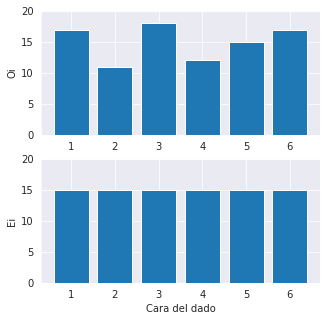

In [51]:
sns.set_style('darkgrid')
plt.figure(figsize = (5, 5))

# grafica de frecuencia observada
plt.subplot(211)
plt.bar(dados['face'], dados['observed'])
plt.ylabel('Oi')
plt.ylim([0, 20])

# grafica de frecuencia esperada
plt.subplot(212)
plt.bar(dados['face'], dados['ei'])
plt.ylabel('Ei')
plt.xlabel('Cara del dado')
plt.ylim([0, 20])
plt.show()

Sacar estadistico de prueba

In [52]:
def x2_calculada(oi, ei):
	x2c = 0
	for i, j in enumerate(oi):
		x = (oi[i] - ei[i]) ** 2
		x = x / ei[i]
		x2c += x
	return x2c

In [53]:
x2_calc = x2_calculada(dados['observed'], dados['ei'])
x2_calc

2.8

In [44]:
st.chisquare(dados['observed'], dados['ei'])

Power_divergenceResult(statistic=2.8, pvalue=0.7307864865887586)

Sacar $X^{2}$ critica

In [62]:
alfa = 0.05
k = len(dados['observed']) # renglones
p = 0 # parametros
gl = k - p - 1 # grados de libertad
x2_crit = st.chi2.isf(alfa, gl)
x2_crit

11.070497693516355

$H_{0}$ se rechaza si:
$X^{2}_{calc} \ge X^{2}_{\alpha, k - p - 1}$

In [63]:
if x2_calc >= x2_crit:
	print('H0 SI se rechaza')
else:
	print('H0 NO se rechaza')

H0 NO se rechaza


Sacar P-valor

In [66]:
st.chi2.sf(abs(x2_calc), gl)

0.2692135134112415